# Phân loại bệnh đái tháo đường

# 1. Định nghĩa vấn đề (Define Problem)
**Mô tả:**

+ Bộ dữ liệu Pima Indians Diabetes bao gồm thông tin y tế của phụ nữ thuộc bộ tộc da đỏ Pima có khả năng mắc bệnh đái tháo đường (diabetes) hay không.
+ Dữ liệu được thu thập để dự đoán khả năng mắc bệnh đái tháo đường dựa trên các chỉ số y sinh.
**Dữ liệu vào:**

+ Pregnancies (Số lần mang thai)
+ Glucose (Nồng độ glucose huyết tương sau 2 giờ trong nghiệm pháp dung nạp glucose)
+ BloodPressure (Huyết áp tâm trương, mmHg)
+ SkinThickness (Độ dày nếp gấp da, mm)
+ Insulin (Nồng độ insulin huyết thanh, μU/ml)
+ BMI (Chỉ số khối cơ thể = cân nặng/chiều cao², kg/m²)
+ DiabetesPedigreeFunction (Chỉ số nguy cơ di truyền tiểu đường)
+ Age (Tuổi)
**Kết quả:** 
+ Outcome (0 = không mắc bệnh đái tháo đường, 1 = mắc bệnh đái tháo đường)

## 2.Chuẩn bị vấn đề (Prepare Problem)

### 2.1. Khai báo thư viện (Load Libraries)

In [187]:
import pandas as pd
import numpy as np
import os
import joblib
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


%matplotlib inline

In [188]:
# Đường dẫn đến file CSV cục bộ
file_path = 'pima-indians-diabetes.data.csv'

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv(file_path)

## 3. Phân tích dữ liệu (Analyze Data)

### 3.1. Thống kê mô tả (Descriptive Statistics)

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [189]:
# Lấy kích thước của dữ liệu (số dòng và số cột)
num_rows, num_columns = data.shape

# In kết quả
print(f"Số dòng của dữ liệu: {num_rows}")
print(f"Số cột của dữ liệu: {num_columns}")

Số dòng của dữ liệu: 767
Số cột của dữ liệu: 9


In [190]:
# shape
print(f'+ Shape: {data.shape}')
# types
print(f'+ Data Types: \n{data.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(data.head(5))
display.display(data.tail(5))
# info
data.info()

+ Shape: (767, 9)
+ Data Types: 
6          int64
148        int64
72         int64
35         int64
0          int64
33.6     float64
0.627    float64
50         int64
1          int64
dtype: object
+ Contents: 


6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

6  148  72  35    0  33.6  0.627  50  1
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Nhận xét:

+ Dữ liệu có 8 tính chất để phân lớp: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

+ Các tính chất đều là giá trị số (int hoặc float)

+ Tổng số dòng dữ liệu là 767 dòng

+ Dữ liệu để phân lớp ở cột Outcome (0 = không tiểu đường, 1 = tiểu đường)

In [191]:
# Kiểm tra số lượng giá trị thiếu ở mỗi cột
print("\nSố lượng giá trị thiếu:")
print(data.isnull().sum())

# Kích thước dữ liệu ban đầu
num_rows, num_columns = data.shape
print(f"\nSố dòng của dữ liệu: {num_rows}")
print(f"Số cột của dữ liệu: {num_columns}")
print("Kích thước DataFrame ban đầu:")
print(data.shape)


Số lượng giá trị thiếu:
6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

Số dòng của dữ liệu: 767
Số cột của dữ liệu: 9
Kích thước DataFrame ban đầu:
(767, 9)


#### Nhận xét:

+ Dữ liệu có tổng cộng 767 dòng và 9 cột.

+ Không có giá trị thiếu. 

#### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [192]:
has_null = data.isnull().sum().any()
has_nan  = data.isna().sum().any()
n_duplicated = data.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(data[data.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(data[data.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    s_query1 = "`sepal-length`==4.9 and `sepal-width`==3.1 and `class`=='Iris-setosa'"
    s_query2 = "`sepal-length`==5.8 and `sepal-width`==2.7 and `class`=='Iris-virginica'"
    display.display(data.query(s_query1))
    display.display(data.query(s_query2))
    display.display(data[data.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


#### Nhận xét 
+ Dữ liệu không có bị trùng 
+ Dữ liệu không có giá trị rỗng (Null, Nan)

#### (3) **Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [193]:
description = data.describe().T
display.display(description)

count        mean         std     min      25%      50%      75%  \
6      767.0    3.842243    3.370877   0.000   1.0000    3.000    6.000   
148    767.0  120.859192   31.978468   0.000  99.0000  117.000  140.000   
72     767.0   69.101695   19.368155   0.000  62.0000   72.000   80.000   
35     767.0   20.517601   15.954059   0.000   0.0000   23.000   32.000   
0      767.0   79.903520  115.283105   0.000   0.0000   32.000  127.500   
33.6   767.0   31.990482    7.889091   0.000  27.3000   32.000   36.600   
0.627  767.0    0.471674    0.331497   0.078   0.2435    0.371    0.625   
50     767.0   33.219035   11.752296  21.000  24.0000   29.000   41.000   
1      767.0    0.348110    0.476682   0.000   0.0000    0.000    1.000   

          max  
6       17.00  
148    199.00  
72     122.00  
35      99.00  
0      846.00  
33.6    67.10  
0.627    2.42  
50      81.00  
1        1.00

#### Nhận xét:

+ Dữ liệu có 9 thuộc tính số, tổng cộng 767 dòng.

+ Các giá trị phân bố không đồng đều, một số cột có giá trị trải rộng đến hàng trăm.

+ Xuất hiện giá trị 0 ở nhiều cột, có thể là dữ liệu thiếu hoặc bất thường.

+ Cột cuối cùng (1) là biến phân lớp (Outcome) gồm 2 giá trị: 0 và 1.

In [194]:
# Thông tin tổng quan
print(data.info())
print("\nThống kê mô tả:")
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Thống kê mô tả:
                6         148          72          35           0        33.6  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.

#### (4) **Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**

Đối với bài toán phân lớp (classification problem), chúng ta cần tính số lần xuất hiện của thuộc tính phân lớp. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [195]:
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

In [196]:
import pandas as pd

columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

data = pd.read_csv("pima-indians-diabetes.data.csv", names=columns)

# Giờ gọi được Outcome
print(data['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


 **Nhận xét**
 #### Cột Outcome là phân lớp (class label):

 + 0: Người không mắc bệnh tiểu đường 

 + 1: Người mắc bệnh tiểu đường

#### Dataset Pima Indians Diabetes có tổng cộng 768 mẫu.

 + Có 500 người không mắc bệnh (Outcome = 0)

 + Có 268 người mắc bệnh (Outcome = 1)

#### (5) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

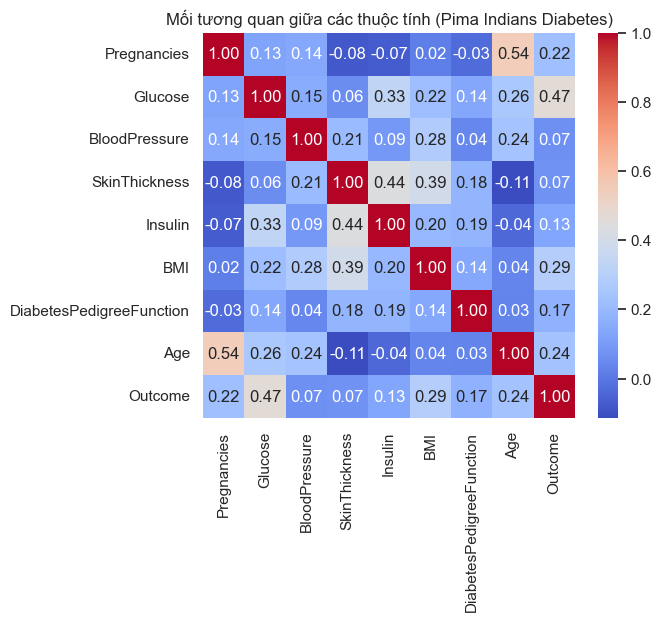

Tương quan của từng thuộc tính với Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [197]:
# Ma trận tương quan
corr_matrix = data.corr()

# Hiển thị ma trận tương quan
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mối tương quan giữa các thuộc tính (Pima Indians Diabetes)")
plt.show()

# In riêng tương quan với Outcome
print("Tương quan của từng thuộc tính với Outcome:")
print(corr_matrix["Outcome"].sort_values(ascending=False))

**Nhận xét:**

+ Thuộc tính có tương quan cao nhất với Outcome là Glucose (≈ 0.49), cho thấy mức đường huyết ảnh hưởng mạnh đến khả năng mắc tiểu đường

+ Các thuộc tính quan trọng tiếp theo: BMI, Age, Pregnancies.

+ Các thuộc tính khác (SkinThickness, Insulin, DiabetesPedigreeFunction, BloodPressure) có tương quan yếu hơn.

+ Không có thuộc tính nào có tương quan quá cao, dự đoán phụ thuộc vào sự kết hợp nhiều yếu tố.

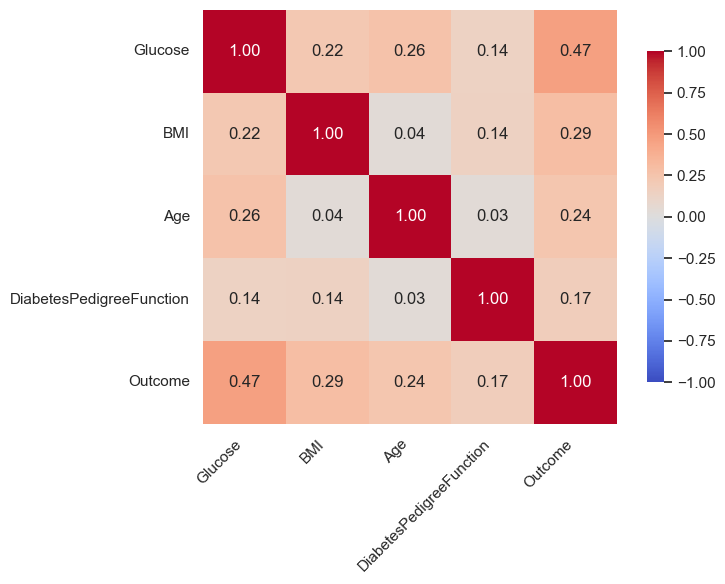

In [198]:
important_cols = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction", "Outcome"]
corr = data[important_cols].corr(method="pearson")

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="coolwarm", vmin=-1, vmax=1,
    cbar_kws={"shrink": 0.8},
    square=True
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Nhận xét & So sánh:**

+ Cả hai ma trận đều cho thấy Glucose có tương quan mạnh nhất với Outcome (~0.49).

+ BMI và Age giữ mức tương quan trung bình, ổn định giữa hai ma trận.

+ DiabetesPedigreeFunction có tương quan thấp nhất (0.17) nhưng vẫn có ý nghĩa về mặt y học.

+ Ma trận đầy đủ xuất hiện nhiều biến tương quan chéo thấp (Insulin, SkinThickness).

+ Ma trận rút gọn loại bỏ biến ít đóng góp, giúp tập trung vào các biến quan trọng.

+ Thứ tự mức độ ảnh hưởng đến Outcome không thay đổi, nhưng ma trận rút gọn làm nổi bật nhóm biến dự báo mạnh hơn.

In [199]:
# Các cột mà giá trị 0 có thể biểu thị dữ liệu thiếu
zero_as_missing_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Thay 0 bằng NaN ở những cột này
data_zero_missing = data.copy()
for col in zero_as_missing_cols:
    num_zero = (data_zero_missing[col] == 0).sum()
    print(f"{col}: số giá trị bằng 0 = {num_zero} (sẽ coi là missing)")

data_zero_missing[zero_as_missing_cols] = data_zero_missing[zero_as_missing_cols].replace(0, np.nan)
print("\nSố giá trị missing sau khi thay 0 -> NaN:")
print(data_zero_missing.isnull().sum())

# Impute missing bằng median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
data_imputed = data_zero_missing.copy()
data_imputed[zero_as_missing_cols] = imputer.fit_transform(data_zero_missing[zero_as_missing_cols])

print("\nSau impute bằng median, missing counts:")
print(data_imputed.isnull().sum())

Glucose: số giá trị bằng 0 = 5 (sẽ coi là missing)
BloodPressure: số giá trị bằng 0 = 35 (sẽ coi là missing)
SkinThickness: số giá trị bằng 0 = 227 (sẽ coi là missing)
Insulin: số giá trị bằng 0 = 374 (sẽ coi là missing)
BMI: số giá trị bằng 0 = 11 (sẽ coi là missing)

Số giá trị missing sau khi thay 0 -> NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Sau impute bằng median, missing counts:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Nhận xét:**

+ Các thuộc tính như Glucose, BloodPressure, SkinThickness, Insulin, BMI có xuất hiện giá trị bằng 0, được coi là giá trị thiếu (missing).

+ Sau khi thay thế 0 bằng NaN và thực hiện impute bằng median, toàn bộ dữ liệu không còn missing value nào.

+ Dữ liệu đã được làm sạch.

### 3.2. Hiển thị dữ liệu (Visualize Data)

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

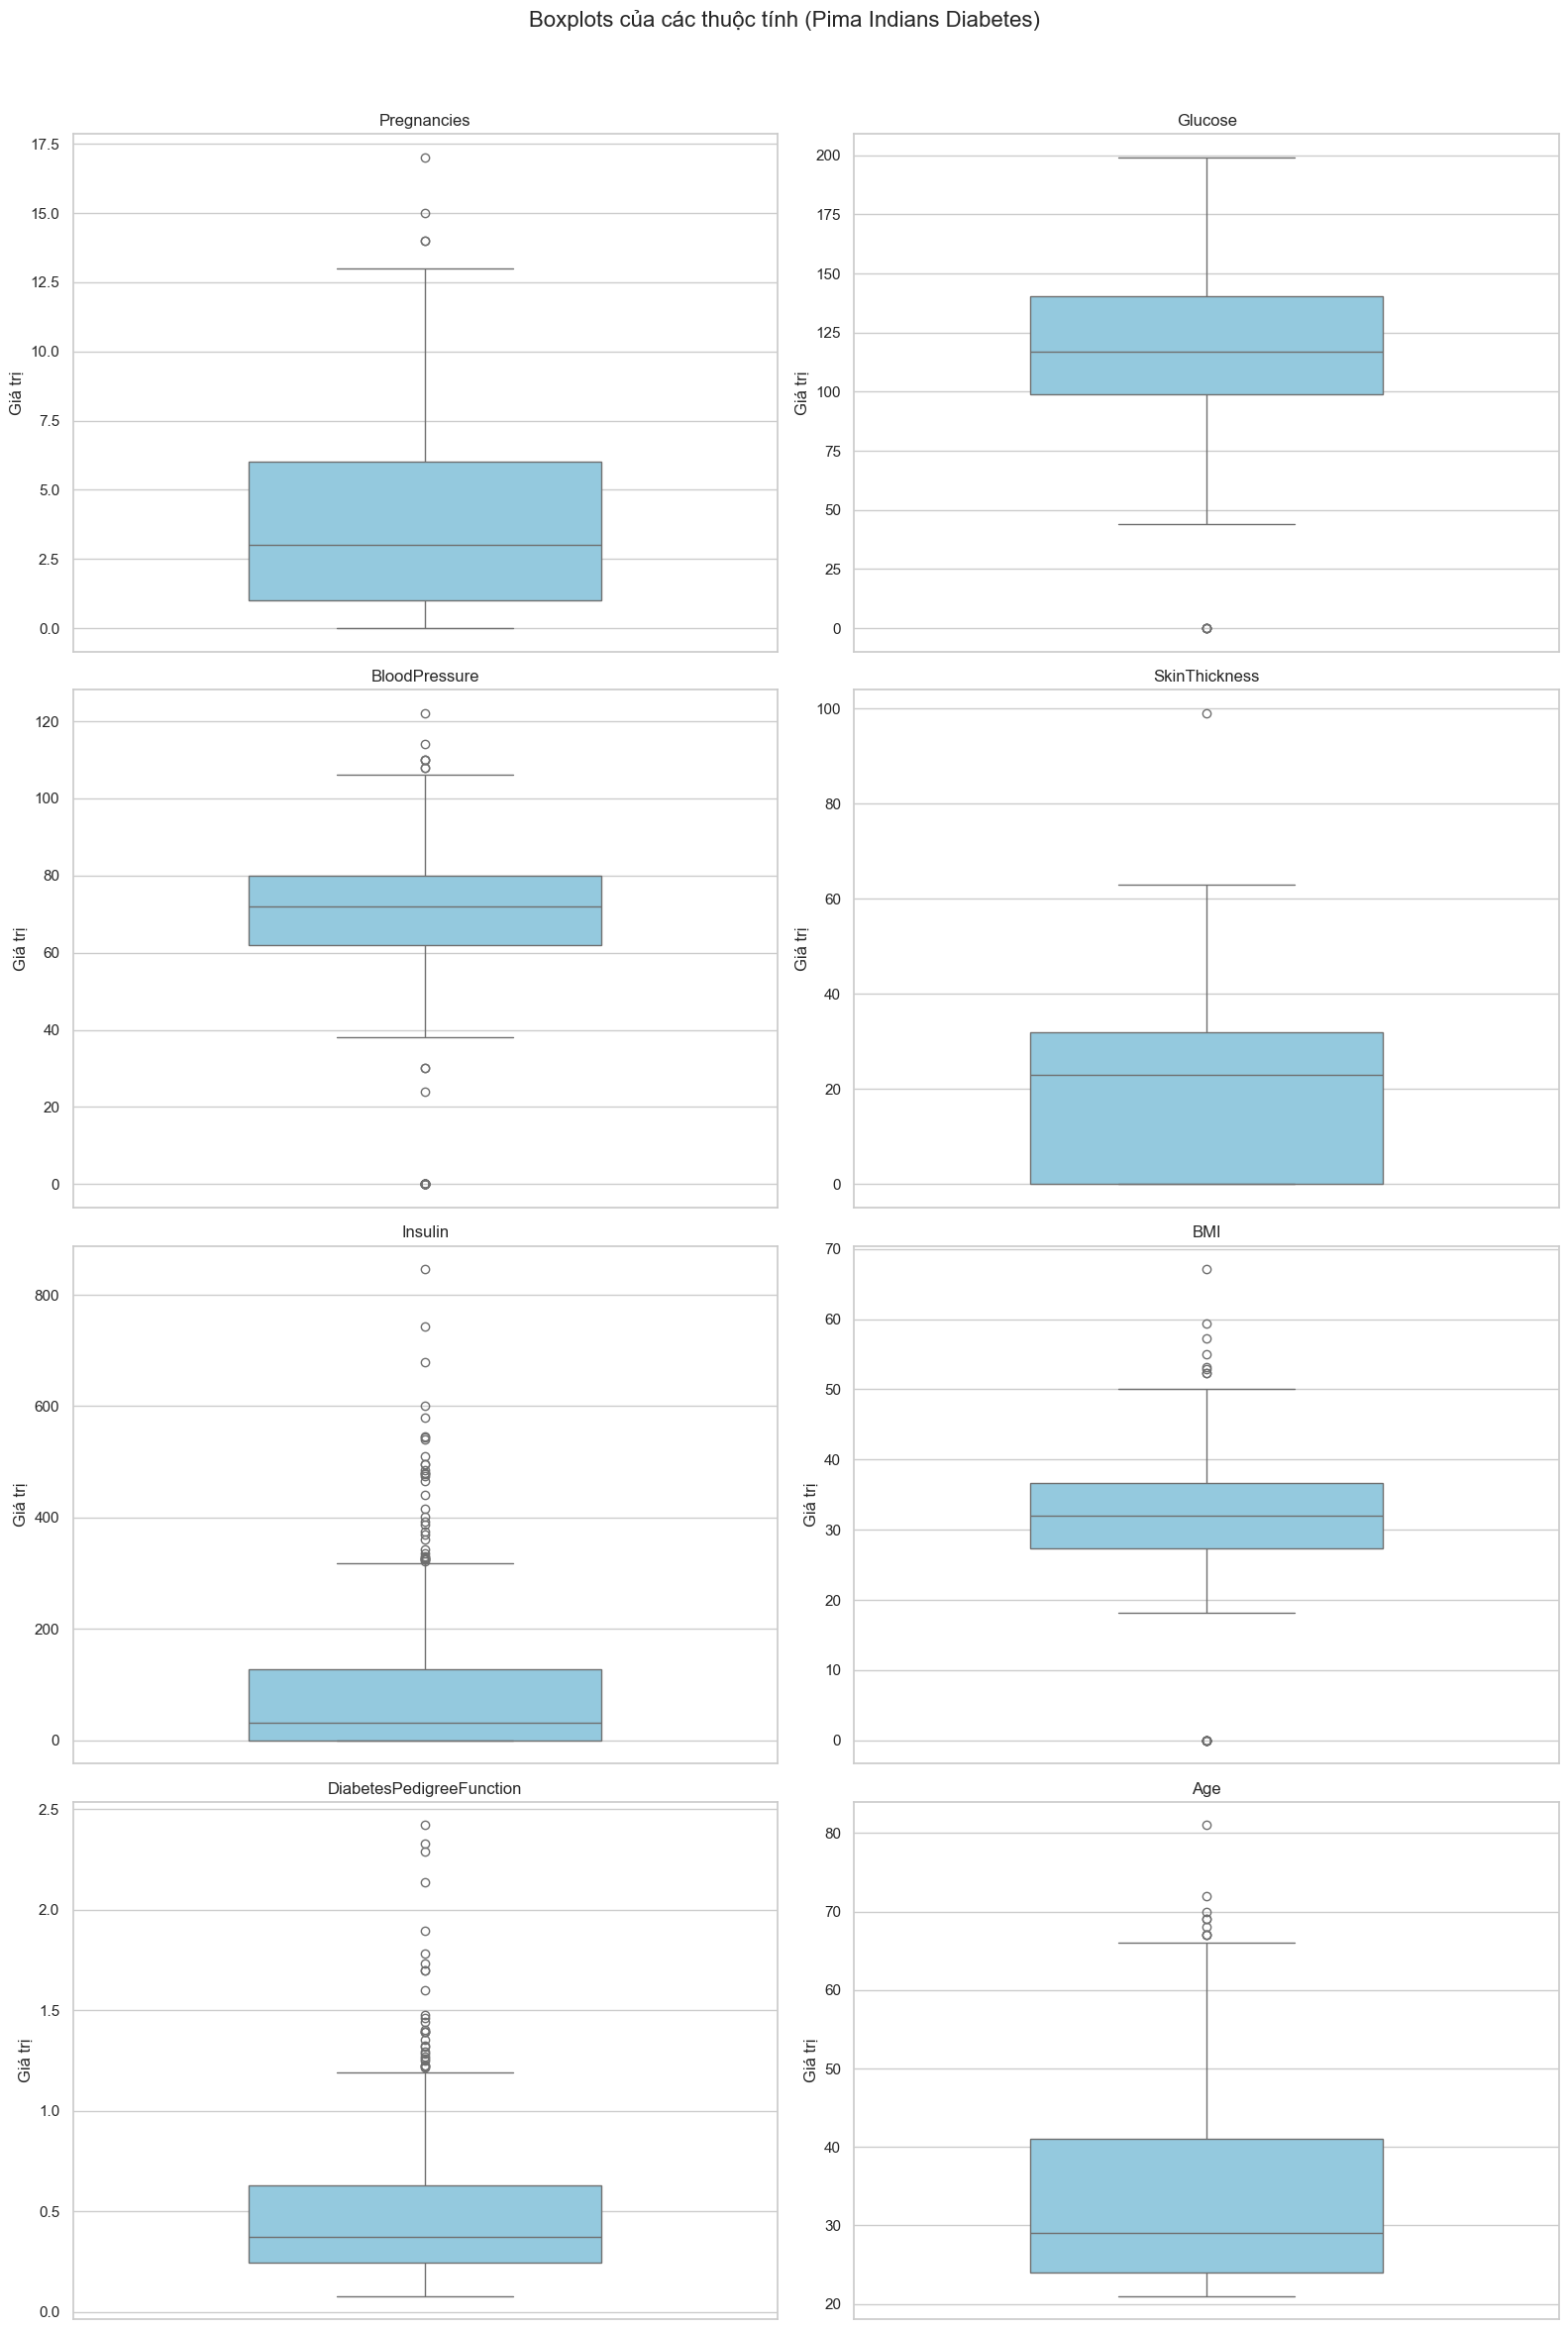

In [200]:
# Danh sách các cột (loại Outcome ra vì là nhãn)
features = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]

# Thiết lập style
sns.set(style="whitegrid", palette="pastel")

# Chia lưới 2 hàng x 4 cột
fig, axes = plt.subplots(4, 2, figsize=(16, 24))

for i, feature in enumerate(features):
    ax = axes[i//2, i%2]  # xác định ô lưới
    sns.boxplot(y=data[feature], ax=ax, color="skyblue", width=0.5)
    ax.set_title(feature, fontsize=12)
    ax.set_xlabel("")  # bỏ nhãn x cho gọn
    ax.set_ylabel("Giá trị")

plt.suptitle("Boxplots của các thuộc tính (Pima Indians Diabetes)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # chỉnh khoảng cách để tiêu đề không bị đè
plt.show()

**Nhận xét Boxplot (Pima Indians Diabetes):**

#### Pregnancies
+ Phần lớn số lần mang thai nằm trong khoảng 0–10, tuy nhiên có một số outlier khá cao (trên 15 lần).
+ Điều này cho thấy có sự phân tán lớn ở thuộc tính này.

#### Glucose
+ Giá trị Glucose phân bố rộng, có một số outlier ở mức rất cao (>200). 
+ Đây là đặc trưng quan trọng để phân loại bệnh tiểu đường.

#### BloodPressure
+ Huyết áp có phân bố khá tập trung trong khoảng 60–90, tuy nhiên xuất hiện nhiều giá trị thấp bất thường (thậm chí bằng 0), có thể coi là giá trị thiếu.

#### SkinThickness
+ Rất nhiều giá trị bằng 0 (không hợp lý về mặt y học), coi như dữ liệu thiếu. 
+ Ngoài ra có một vài outlier ở mức rất cao (>70).

#### Insulin
+ Biến này có rất nhiều giá trị bằng 0 (thiếu dữ liệu) và xuất hiện một số outlier rất lớn (>600), cho thấy phân bố bị lệch mạnh.

#### BMI
+ Phân bố BMI tập trung chủ yếu trong khoảng 20–40, tuy nhiên cũng có outlier khá cao (>50). 
+ Một số giá trị bằng 0 cũng không hợp lý → coi là missing.

#### DiabetesPedigreeFunction
+ Giá trị phần lớn dưới 1, nhưng có một vài outlier rất lớn (>2.0).
+ Điều này cho thấy biến này khá lệch phải (skewed).

#### Age
+ Tuổi chủ yếu tập trung trong khoảng 20–50, nhưng có outlier ở nhóm tuổi cao hơn 70–80.

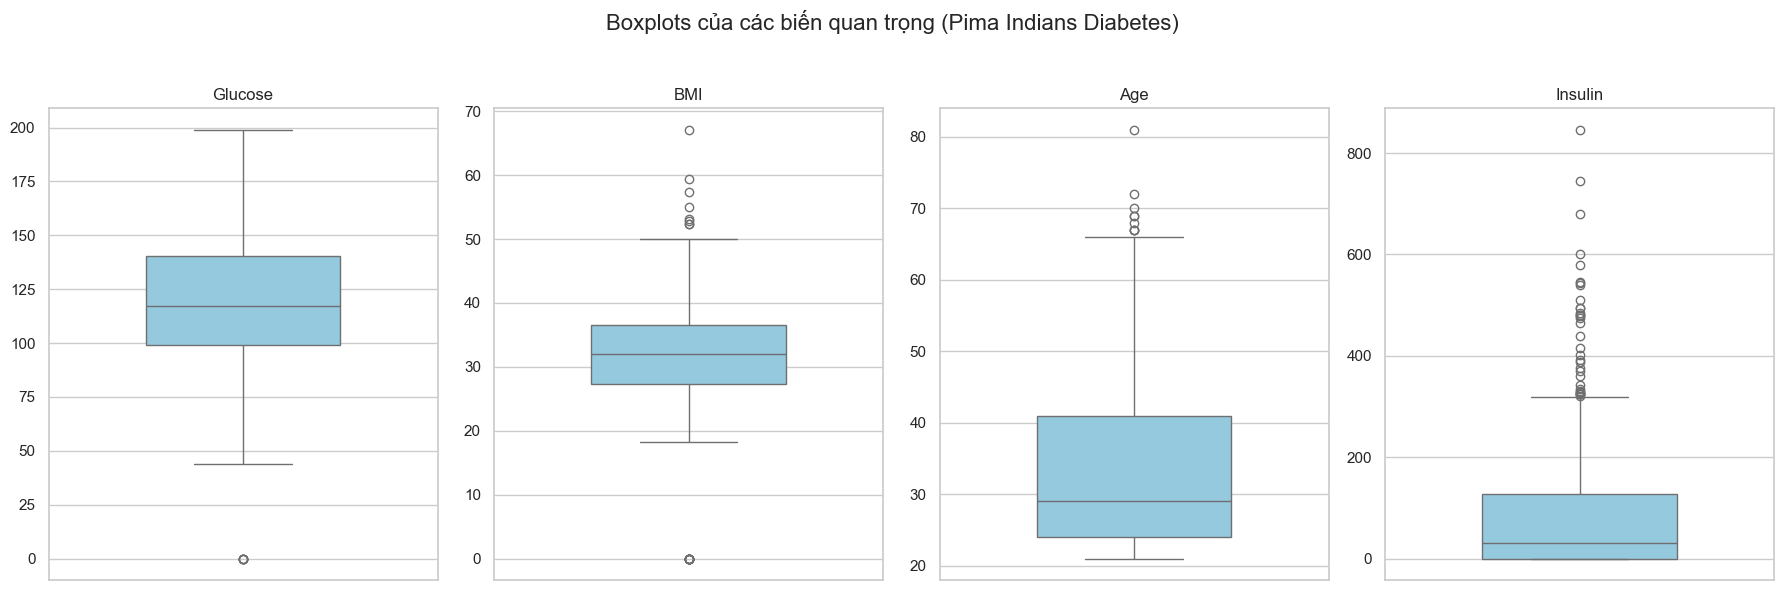

In [201]:
features = ["Glucose", "BMI", "Age", "Insulin"]

fig, axes = plt.subplots(1, 4, figsize=(18, 6))

for i, feature in enumerate(features):
    sns.boxplot(y=data[feature], ax=axes[i], color="skyblue", width=0.5)
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle("Boxplots của các biến quan trọng (Pima Indians Diabetes)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Nhận xét Boxplots các biến quan trọng (Glucose, BMI, Age, Insulin):**

#### Glucose:

+ Phân bố trải rộng, trung vị ở khoảng 120.

+ Xuất hiện nhiều outlier cao (>200).

+ Đây là biến phân biệt rõ ràng giữa bệnh nhân tiểu đường và người bình thường.

#### BMI:

+ Tập trung trong khoảng 20–40, trung vị khoảng 30.

+ Một số outlier cao >50.

+ Một vài giá trị bằng 0 không hợp lý, coi như missing.

#### Age:

+ Giá trị tuổi tập trung chủ yếu trong khoảng 20–50.

+ Có outlier ở nhóm cao tuổi (>70).

+ Tuổi càng cao thì nguy cơ mắc tiểu đường càng tăng → biến quan trọng.

#### Insulin:

+ Phân bố bị lệch mạnh, rất nhiều giá trị bằng 0 (missing).

+ Một số outlier cực lớn (>600).

+ Biến này khó sử dụng trực tiếp, cần xử lý trước khi đưa vào mô hình.

**So sánh với Boxplot 8 biến (toàn bộ features):**

+ Khi xem 8 biến, dễ thấy toàn bộ dữ liệu có nhiều ngoại lệ (outliers) và giá trị bằng 0 bất hợp lý (BloodPressure, SkinThickness, Insulin, BMI).

#### Tuy nhiên, trong 4 biến quan trọng thì:

+ Glucose, BMI, Age có phân bố tương đối hợp lý, rõ ràng và hữu ích cho phân loại.

+ Insulin tuy có nhiều missing và outlier nhưng vẫn được chọn vì có ý nghĩa y học (liên quan trực tiếp đến bệnh tiểu đường).

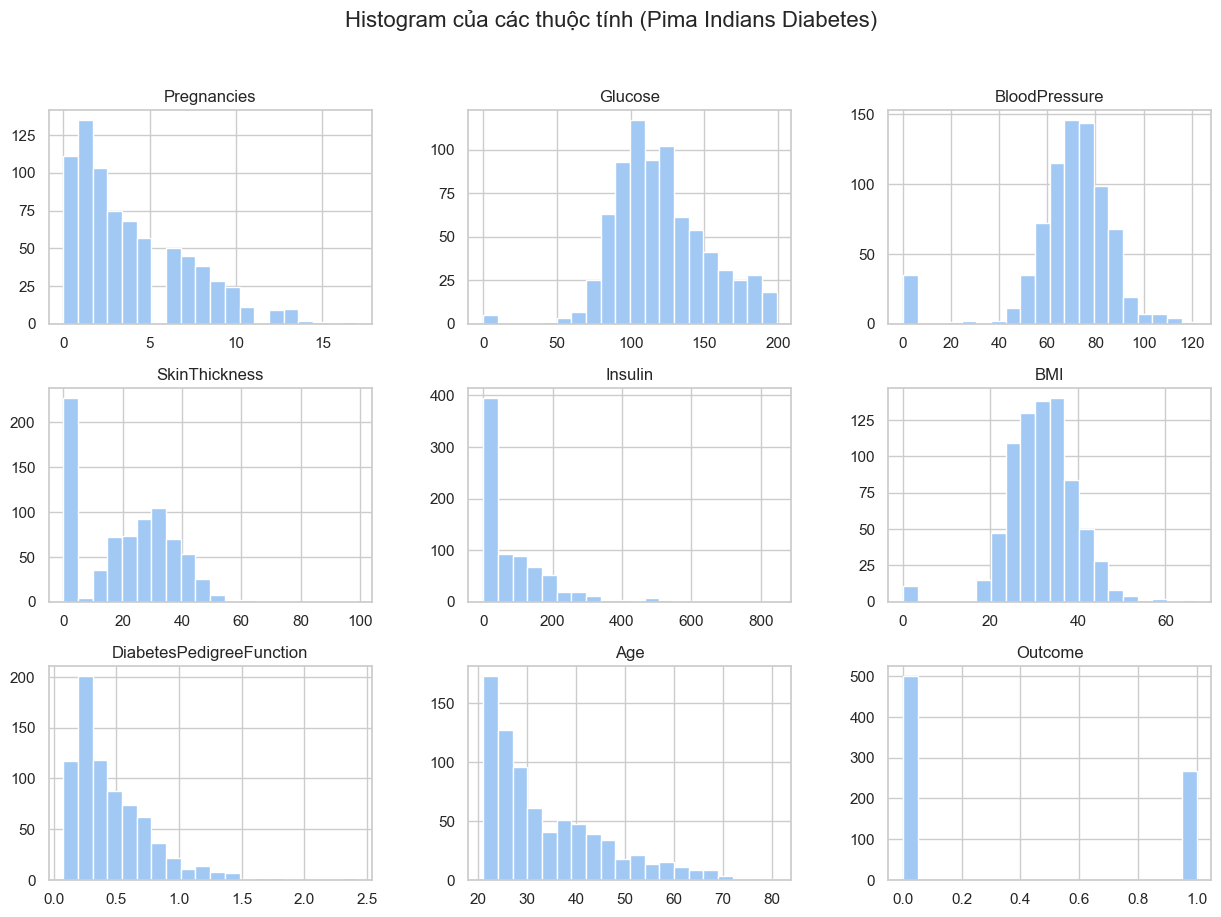

In [202]:
data.hist(figsize=(15, 10), bins=20, sharex=False, sharey=False)
plt.suptitle("Histogram của các thuộc tính (Pima Indians Diabetes)", fontsize=16)
plt.show()


**Nhận xét Histogram:**

+ Glucose: phân bố lệch phải, tập trung nhiều quanh 100–150, ít trường hợp >200.

+ BMI: chủ yếu 20–40, một số giá trị bằng 0 bất thường.

+ Age: đa số trong khoảng 20–50, ít người trên 70.

+ Insulin, SkinThickness, BloodPressure: nhiều giá trị 0, phân bố lệch phải

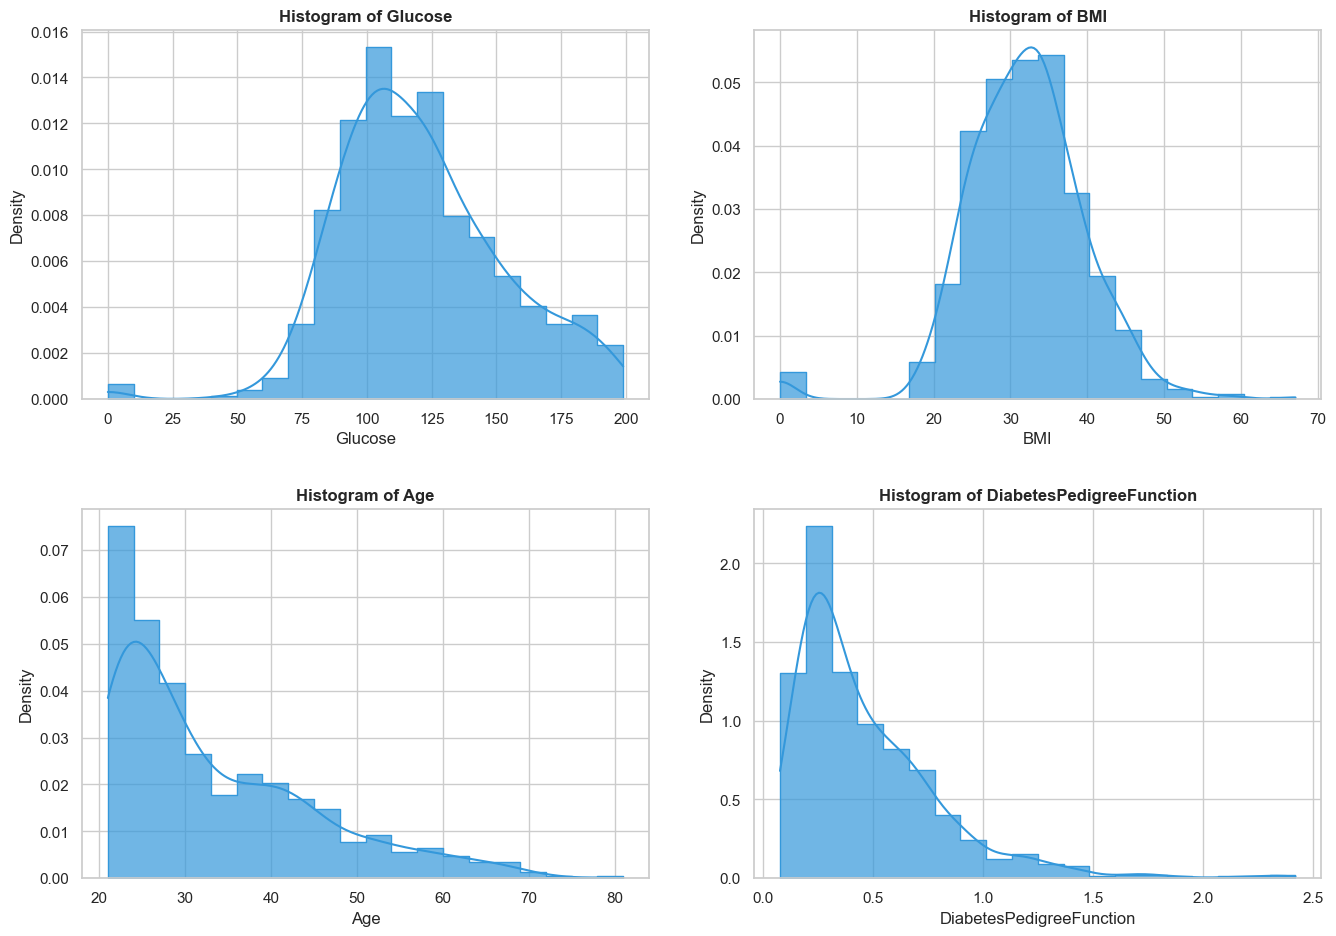

In [203]:

important_cols = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.histplot(
        data=data,
        x=col,
        bins=20,
        kde=True,
        element="step",
        stat="density",
        ax=axes[i],
        color="#3498DB",   
        alpha=0.7
    )
    axes[i].set_title(f"Histogram of {col}", fontsize=12, fontweight="bold")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

plt.tight_layout(pad=2.5)
plt.show()


**Nhận xét:**

 Glucose:phân bố lệch phải, tập trung chủ yếu ở mức 100–150. 
+ Đây là biến có ý nghĩa y khoa cao, vì giá trị cao thường liên quan đến nguy cơ tiểu đường.

 BMI: phân bố gần chuẩn, đa số tập trung trong khoảng 25–35. 
+ Một số giá trị lớn tạo thành outlier cho thấy nhiều người có tình trạng thừa cân/béo phì.

Age:nghiêng về bên trái, tập trung nhiều ở nhóm dưới 50 tuổi, số người lớn tuổi ít hơn. 
+ Biểu đồ gợi ý nghiên cứu thiên về người trung niên.

DiabetesPedigreeFunction (DPF): phần lớn nhỏ hơn 0.5, nhưng có vài giá trị rất cao (outlier). 
+ Điều này cho thấy đa số người có yếu tố di truyền thấp, chỉ một số ít có nguy cơ cao do gia đình.

 **Tổng kết:** 4 biến này đều quan trọng trong dự đoán tiểu đường, trong đó Glucose và BMI thể hiện xu hướng rõ rệt, còn Age và DPF cho thấy sự khác biệt về nhóm đối tượng và nguy cơ di truyền.

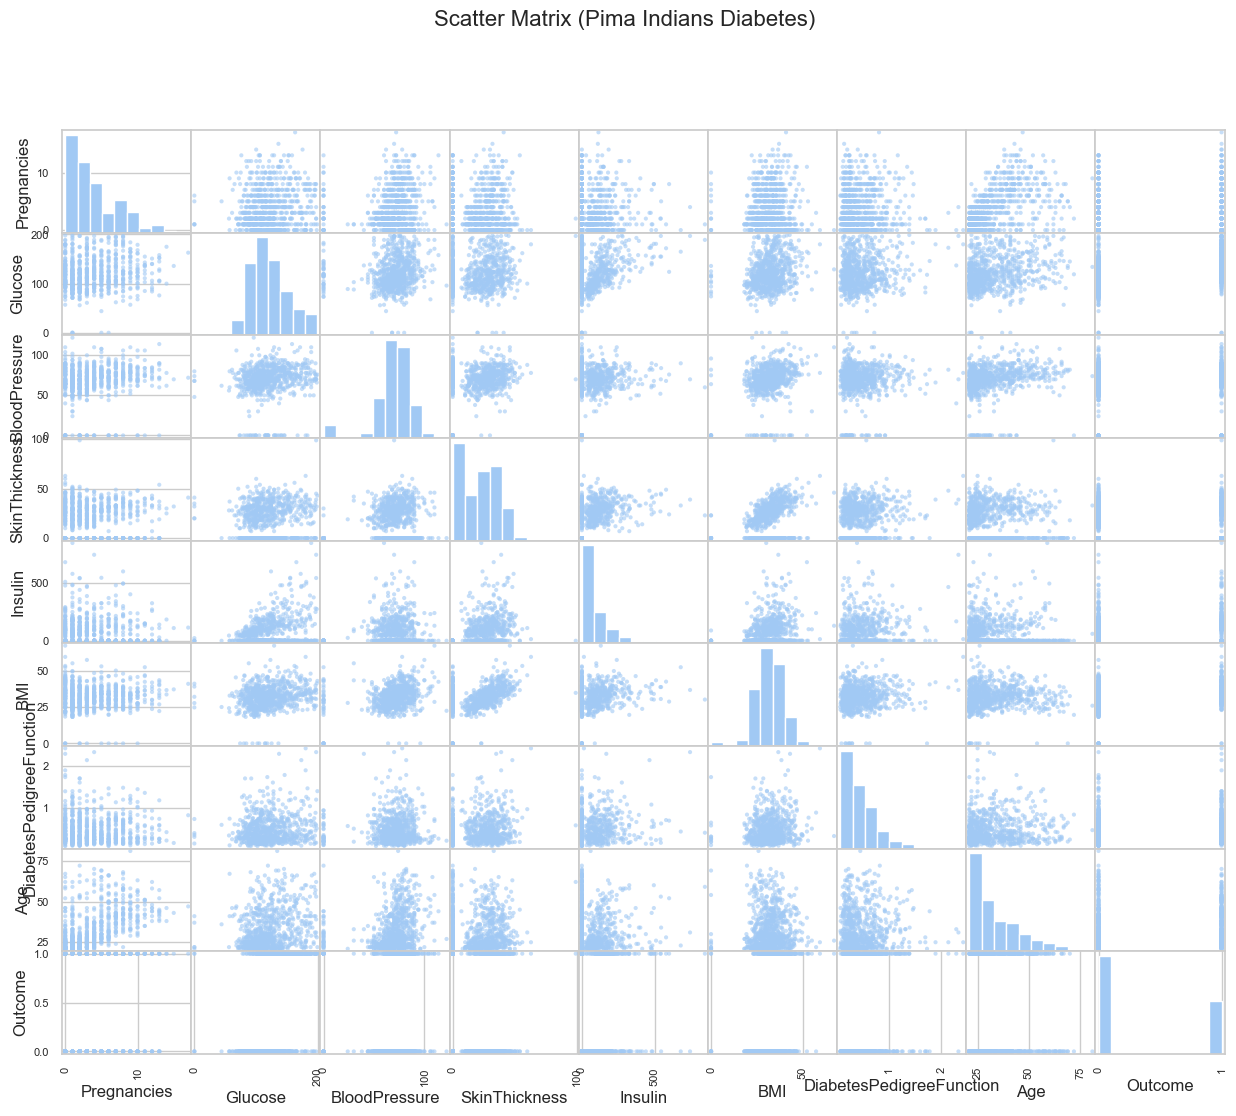

In [204]:
pd.plotting.scatter_matrix(data, figsize=(15, 12), diagonal="hist", alpha=0.6)
plt.suptitle("Scatter Matrix (Pima Indians Diabetes)", fontsize=16)
plt.show()


**Nhận xét (Scatter Matrix):**

Các biểu đồ trên đường chéo (diagonal) thể hiện histogram của từng thuộc tính cho thấy phân bố giá trị của từng biến. 
+ Ví dụ: Glucose và BMI lệch phải, Age tập trung ở nhóm trẻ, còn Insulin rải rác và nhiều giá trị cực đoan.

Các biểu đồ ngoài đường chéo thể hiện mối quan hệ cặp đôi giữa các thuộc tính:

+ Có xu hướng tương quan dương rõ rệt giữa Glucose và BMI → khi đường huyết cao, BMI thường cũng cao.

+ Age và Pregnancies có mối quan hệ dương (người lớn tuổi thường có số lần mang thai nhiều hơn).

+ Các cặp biến khác như Insulin và SkinThickness thể hiện phân tán mạnh, không có tương quan tuyến tính rõ ràng.

Các cụm điểm trong ma trận gợi ý rằng dữ liệu có thể tách nhóm dựa trên một số biến quan trọng (Glucose, BMI, Age).

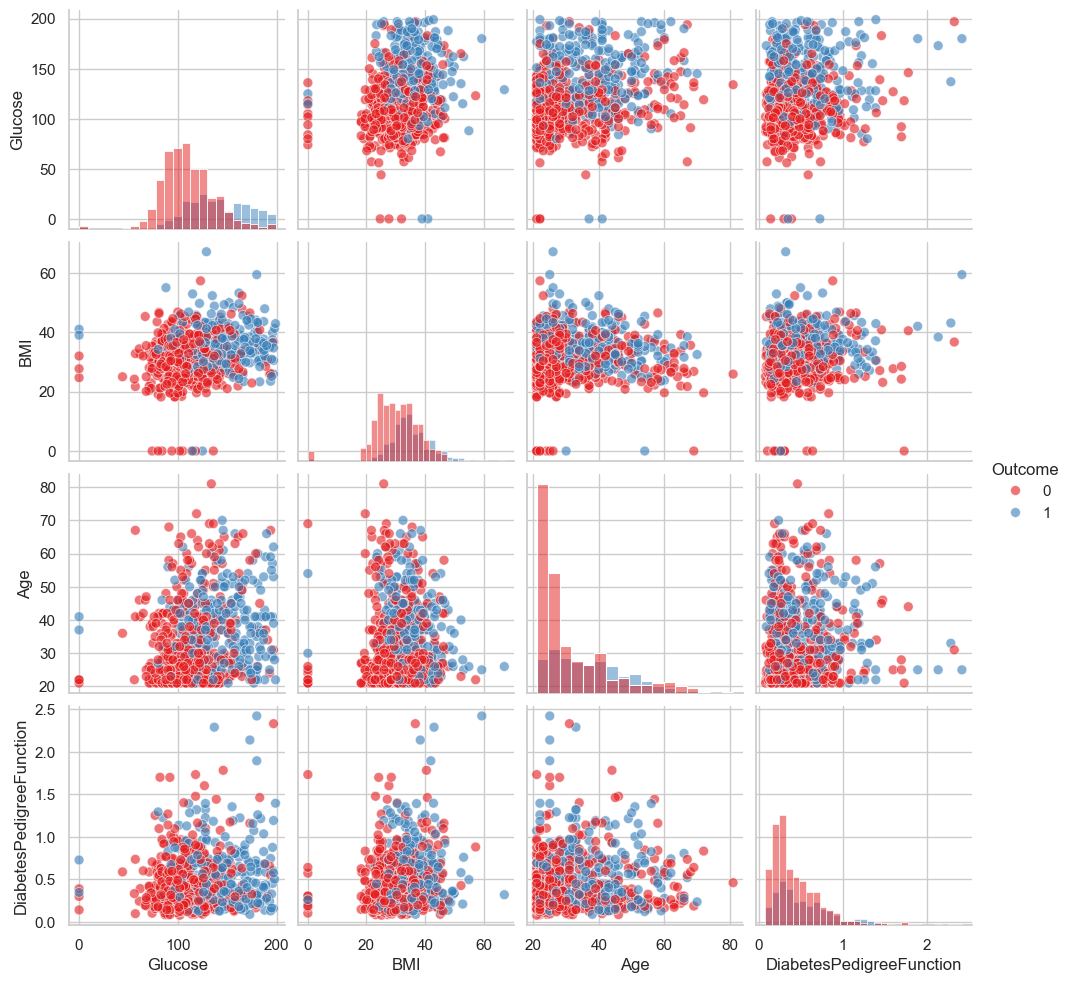

In [205]:
important_cols = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]

sns.pairplot(
    data,
    vars=important_cols,
    hue="Outcome",        
    palette="Set1",       
    diag_kind="hist",     
    plot_kws={'alpha':0.6, 's':50}  
)

plt.show()

**Nhận xét (Pairplot với Outcome):**

Trục chéo là histogram của từng biến (Glucose, BMI, Age, DiabetesPedigreeFunction) được tách theo màu của Outcome. Có thể thấy:

+ Người mắc tiểu đường (Outcome = 1, màu đỏ) thường có Glucose và BMI cao hơn so với nhóm không mắc.

+ Ở biến Age, nhóm mắc tiểu đường có xu hướng nhiều ở độ tuổi trung niên trở lên.

+ Với DiabetesPedigreeFunction, phân bố hai nhóm khá chồng lấn nhưng nhóm mắc tiểu đường có nhiều giá trị cao hơn.

Các biểu đồ ngoài đường chéo (scatter):

+ Glucose và BMI có xu hướng phân nhóm rõ: nhóm tiểu đường tập trung ở giá trị cao, nhóm không tiểu đường ở giá trị thấp hơn.

+ Age cũng hỗ trợ phân biệt, khi tuổi càng cao thì khả năng mắc bệnh tăng.

+ Các mối quan hệ khác (ví dụ BMI – DiabetesPedigreeFunction) cho thấy phân tán mạnh, ít tuyến tính

# 4. Chuẩn bị dữ liệu (Prepare Data)

## 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) Tạo bảng dữ liệu làm sạch

In [206]:
data_clean = data.copy()

#### (2) Xóa dữ liệu trùng nhau

In [207]:
display.display(data[data.duplicated()])

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

Không có dữ liệu trùng.

#### (3) Xử lý giá trị rỗng, không hợp lệ

In [208]:
has_null = data.isnull().sum().any()
has_nan  = data.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(data[data.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(data[data.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


## 4.2. Biến đổi dữ liệu (Data Transforms

####  (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [209]:
class_encoder = LabelEncoder()
class_encoder.fit(data_clean["Outcome"])
class_names = class_encoder.classes_
print(class_names)

[0 1]


In [210]:
class_encoder.transform(data_clean["Outcome"])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [211]:
data_clean["Outcome"] = class_encoder.transform(data_clean["Outcome"])
data_clean

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [212]:
scale_columns = [c for c in data.columns if c != "Outcome"]
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(data_clean[scale_columns])
df_clean_minmax = data_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(data_clean[scale_columns])
df_clean_minmax

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.234415  0.483333        1  
1                    0.116567  0.166667        0  
2                    0.253629  0.183333        1  
3                    0.038002  0.000000        0  
4                    0.943638  0.200000        1  
..                        ...       ...      ...  
763                  0.039710  0.700000        0  
764                  0.111870  0.100000        0  
765                  0.071307  0.150000        0  
766                  0.115713  0.433333        1  
767                  0.101196  0.033333        0  

[768 rows x 9 columns]

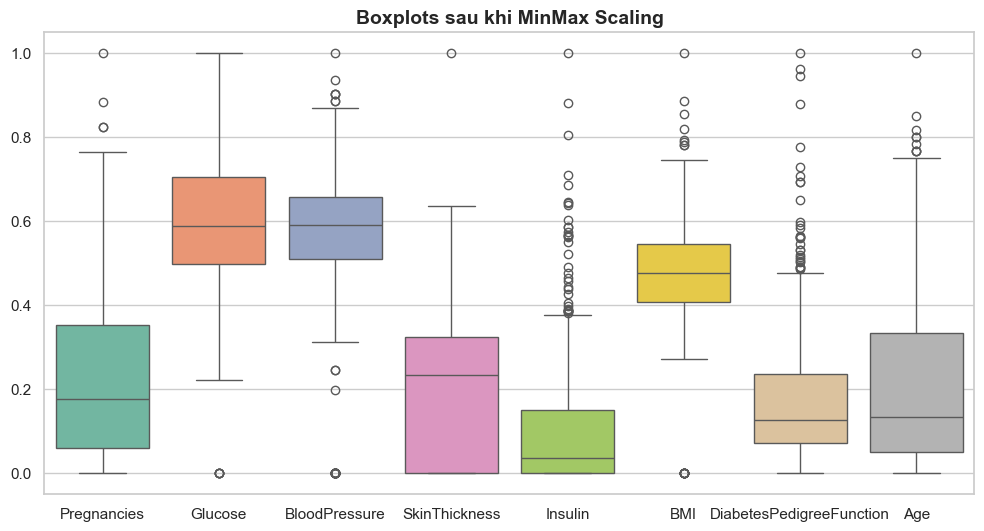

In [227]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean_minmax[scale_columns], palette="Set2")
plt.title("Boxplots sau khi MinMax Scaling", fontsize=14, fontweight="bold")
plt.show()

In [219]:
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1      -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2       1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3      -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4      -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.679069       0.298896       2.150354  0.455573  0.064737   
764    -0.547919  0.011301      -0.197433      -0.239949 -0.181541  0.632365   
765     0.342981 -0.021574      -0.031990      -0.695245 -0.332132 -0.910418   
766    -0.844885  0.142800      -1.024647      -0.012301 -0.181541 -0.342790   
767    -0.844885 -0.942068      -0.197433       0.215347 -0.181541 -0.299127   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.468492  1.425995        1  
1                   -0.365061 -0.190672        0  
2                    0.604397 -0.105584        1  
3                   -0.920763 -1.041549        0  
4                    5.484909 -0.020496        1  
..                        ...       ...      ...  
763                 -0.908682  2.532136        0  
764                 -0.398282 -0.531023        0  
765                 -0.685193 -0.275760        0  
766                 -0.371101  1.170732        1  
767                 -0.473785 -0.871374        0  

[768 rows x 9 columns]

In [220]:
correlations = df_clean_standard.corr(method='pearson')
display.display(correlations)

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419451  0.231049                  0.137327   
BloodPressure             0.045363  0.281257                 -0.002378   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   
Outcome                   0.203790  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.126107  0.214873  
Insulin                   0.097101  0.203790  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [221]:
# Lưu thông tin
save_dir = "exps/iris"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save cleaning data
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

df_clean_minmax.to_excel(f'{save_dir}/df_clean_minmax.xlsx', index=False)

df_clean_standard.to_excel(f'{save_dir}/df_clean_standard.xlsx', index=False)

# Save encoders
joblib.dump(class_encoder, f'{save_dir}/Outcome_encoder.joblib')

os.listdir(save_dir)

['df_clean.xlsx',
 'df_clean_minmax.xlsx',
 'df_clean_standard.xlsx',
 'Outcome_encoder.joblib']

In [222]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35      125  33.6   
1              1       85             66             29      125  26.6   
2              8      183             64             29      125  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27      125  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60             29      125  30.1   
767            1       93             70             31      125  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [223]:
pd.read_excel(f'{save_dir}/df_clean_minmax.xlsx')

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.234415  0.483333        1  
1                    0.116567  0.166667        0  
2                    0.253629  0.183333        1  
3                    0.038002  0.000000        0  
4                    0.943638  0.200000        1  
..                        ...       ...      ...  
763                  0.039710  0.700000        0  
764                  0.111870  0.100000        0  
765                  0.071307  0.150000        0  
766                  0.115713  0.433333        1  
767                  0.101196  0.033333        0  

[768 rows x 9 columns]

In [224]:
pd.read_excel(f'{save_dir}/df_clean_standard.xlsx')

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1      -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2       1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3      -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4      -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.679069       0.298896       2.150354  0.455573  0.064737   
764    -0.547919  0.011301      -0.197433      -0.239949 -0.181541  0.632365   
765     0.342981 -0.021574      -0.031990      -0.695245 -0.332132 -0.910418   
766    -0.844885  0.142800      -1.024647      -0.012301 -0.181541 -0.342790   
767    -0.844885 -0.942068      -0.197433       0.215347 -0.181541 -0.299127   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.468492  1.425995        1  
1                   -0.365061 -0.190672        0  
2                    0.604397 -0.105584        1  
3                   -0.920763 -1.041549        0  
4                    5.484909 -0.020496        1  
..                        ...       ...      ...  
763                 -0.908682  2.532136        0  
764                 -0.398282 -0.531023        0  
765                 -0.685193 -0.275760        0  
766                 -0.371101  1.170732        1  
767                 -0.473785 -0.871374        0  

[768 rows x 9 columns]

In [225]:
joblib.load(f'{save_dir}/Outcome_encoder.joblib').classes_

array([0, 1])

# Kết thúc